<a href="https://colab.research.google.com/github/padmakar-rp/High-Quality-Stable-Diffusion-Image-Generator/blob/main/High_Quality_Stable_Diffusion_Image_Generator_with_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

CLIPTextModel LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/text_encoder
Key                                | Status     |  | 
-----------------------------------+------------+--+-
text_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its resul

Enter detailed prompt for high-quality image:
generate a image of a white persian cat with blue eyes 


  0%|          | 0/60 [00:00<?, ?it/s]

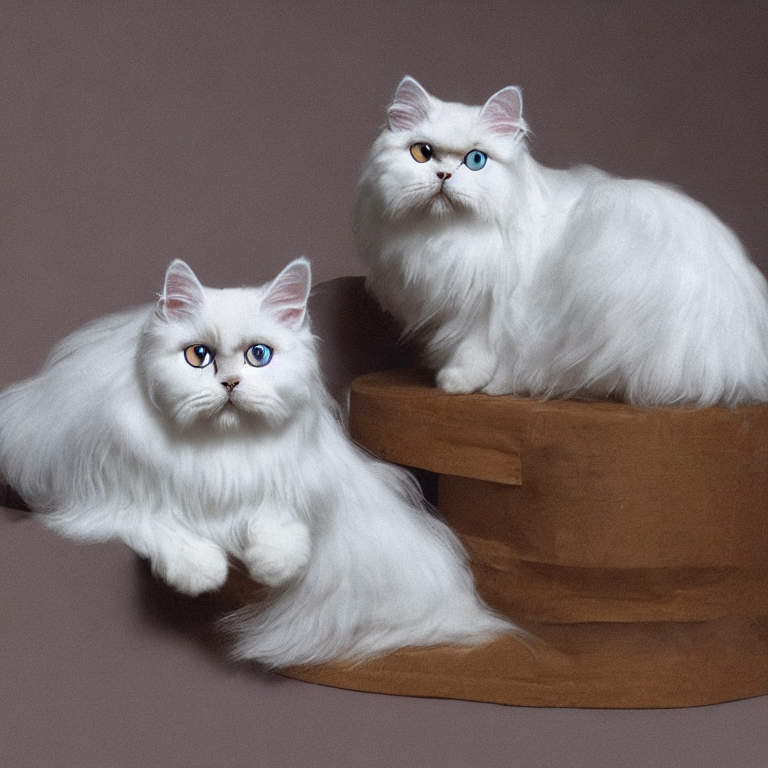

Image saved as high_quality_image.png


In [4]:
# Install required libraries
!pip install -q diffusers transformers accelerate torch safetensors

import torch
from diffusers import StableDiffusionPipeline
from IPython.display import display

# Use GPU
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load high-quality Stable Diffusion model
model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    safety_checker=None  # improves speed
)

pipe = pipe.to(device)

# Enable memory efficient attention (important for Colab)
pipe.enable_attention_slicing()

# Take user prompt
prompt = input("Enter detailed prompt for high-quality image:\n")

# Generate high-quality image
image = pipe(
    prompt,
    height=768,          # Higher resolution
    width=768,
    num_inference_steps=60,   # More steps = better quality
    guidance_scale=8.5        # Higher guidance = more accurate to prompt
).images[0]

# Display image
display(image)

# Save image
image.save("high_quality_image.png")

print("Image saved as high_quality_image.png")